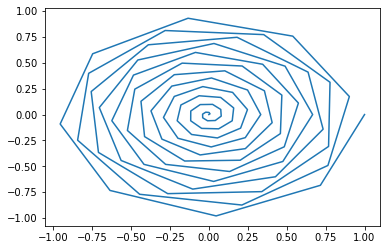

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

n = 100
angle = np.linspace(0,12*2*np.pi, n)
radius = np.linspace(0,1.,n)

x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.plot(x,y)
plt.show()

In [5]:
X = np.array(list(zip(x, y)))
Y = np.array(list(zip(y)))

# print(np.shape(X))
# print(np.shape(Y))
# print(Y)
# X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
# Y = np.array([ [0], [1], [1], [0] ])

In [14]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def tanH(self, x, der=False):
        if der == True:
            return 1 - (x**2)
        else:
            return (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.tanH(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.tanH(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.tanH(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.tanH(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

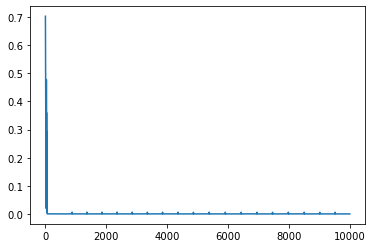

In [15]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [20]:
class NeuralNetwork2(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def relu(self, x, der=False):
        if der == True:
            return list(map(lambda a: 1 if a>=0 else 0, x))
        else:
            return list(map(lambda a: a if a>=0 else 0, x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.relu(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.relu(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.relu(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.relu(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [ ]:
NN2 = NeuralNetwork2()

err = []
for i in range(10000):
    NN2.train(X,Y)
    err.append(np.mean(np.square(Y - NN2.feedForward(X))))

plt.plot(err)